In [34]:
import pandas as pd 

dataset = pd.read_csv("H:/Machine Learning & Image Processing Course - AIE/NN to predict the probability of having a heard disease/heart.csv").values

#read and store the dataset in a numpy arrray



In [35]:
data=dataset[:,0:13]
target= dataset[:,13]

In [36]:


from keras.utils import np_utils

#target=np_utils.to_categorical(target)
#converting the labels into categorical labels


In [37]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

#model.build(input_shape =(303,2))

model.add(Dense(8,input_dim =13, activation='relu'))

model.add(Dense(16,input_dim=8, activation='relu'))

model.add(Dense(8,input_dim=16, activation='relu')) 
model.add(Dense(2, input_dim=8, activation='softmax'))
          
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 18        
Total params: 410
Trainable params: 410
Non-trainable params: 0
_________________________________________________________________


In [42]:
from sklearn.model_selection import train_test_split

train_data,test_data, train_target, test_target= train_test_split(data,target,test_size=0.2)
new_train_target = np_utils.to_categorical(train_target)
train_infor = model.fit(train_data,new_train_target, epochs = 150)

Epoch 1/150
242/242 [==============================] - 0s 54us/step - loss: 0.4914 - accuracy: 0.7479
Epoch 2/150
242/242 [==============================] - 0s 54us/step - loss: 0.4875 - accuracy: 0.7562
Epoch 3/150
242/242 [==============================] - 0s 74us/step - loss: 0.4900 - accuracy: 0.7562
Epoch 4/150
242/242 [==============================] - 0s 62us/step - loss: 0.4870 - accuracy: 0.7686
Epoch 5/150
242/242 [==============================] - 0s 62us/step - loss: 0.4922 - accuracy: 0.7479
Epoch 6/150
242/242 [==============================] - 0s 66us/step - loss: 0.4947 - accuracy: 0.7562
Epoch 7/150
242/242 [==============================] - 0s 49us/step - loss: 0.4877 - accuracy: 0.7603
Epoch 8/150
242/242 [==============================] - 0s 54us/step - loss: 0.4927 - accuracy: 0.7769
Epoch 9/150
242/242 [==============================] - 0s 49us/step - loss: 0.4828 - accuracy: 0.7727
Epoch 10/150
242/242 [==============================] - 0s 54us/step - loss: 0.478

242/242 [==============================] - 0s 62us/step - loss: 0.4382 - accuracy: 0.7727
Epoch 81/150
242/242 [==============================] - 0s 66us/step - loss: 0.4459 - accuracy: 0.8017
Epoch 82/150
242/242 [==============================] - 0s 70us/step - loss: 0.4271 - accuracy: 0.7893
Epoch 83/150
242/242 [==============================] - 0s 58us/step - loss: 0.4297 - accuracy: 0.7975
Epoch 84/150
242/242 [==============================] - 0s 54us/step - loss: 0.4212 - accuracy: 0.7934
Epoch 85/150
242/242 [==============================] - 0s 54us/step - loss: 0.4348 - accuracy: 0.7934
Epoch 86/150
242/242 [==============================] - 0s 45us/step - loss: 0.4232 - accuracy: 0.8017
Epoch 87/150
242/242 [==============================] - 0s 41us/step - loss: 0.4262 - accuracy: 0.7975
Epoch 88/150
242/242 [==============================] - 0s 54us/step - loss: 0.4475 - accuracy: 0.7603
Epoch 89/150
242/242 [==============================] - 0s 49us/step - loss: 0.4321 - 

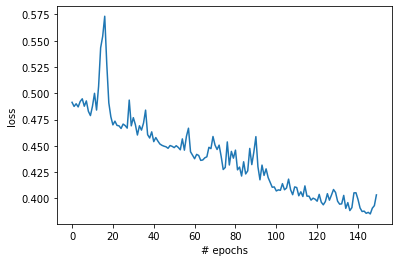

In [43]:
import matplotlib.pyplot as plt

plt.plot(train_infor.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [45]:
predicted_target= model.predict(test_data)

new_test_target=np_utils.to_categorical(test_target)
print(model.evaluate(test_data,new_test_target))

61/61 [==============================] - 0s 196us/step
[0.41940512911218114, 0.8196721076965332]
